# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [281]:
df = pd.read_csv("C:/Users/misha/Desktop/British Airways/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [282]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [240]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [244]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


### Importing libraries

In [129]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from scipy.stats import randint
# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns


### Preprocessing the data 

In [287]:
data = df
data = pd.get_dummies(data, columns=['route','sales_channel', 'trip_type', 'booking_origin']) # one-hot encode categorical variables
X = data.drop(['booking_complete'], axis=1)
y = data['booking_complete']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((35000, 917), (15000, 917))

### Establishing a baseline

In [288]:
from sklearn.dummy import DummyClassifier

# Create a dummy classifier that always predicts the most frequent class
dummy_clf = DummyClassifier(strategy="most_frequent")

# Train the dummy classifier on the training data
dummy_clf.fit(X_train, y_train)

# Evaluate the baseline accuracy on the test data
baseline_acc = dummy_clf.score(X_test, y_test)

print('Baseline accuracy:', baseline_acc)

Baseline accuracy: 0.8522666666666666


### Training the model

In [289]:
# Train the model
clf = RandomForestClassifier(n_estimators=500, max_depth=3, min_samples_leaf=3, random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.8522666666666666


### Visualizing trees

In [ ]:
#Visualize
for i in range(3):
    tree = clf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True,
                               class_names=['Booking', "No booking"])
    graph = graphviz.Source(dot_data)
    display(graph)


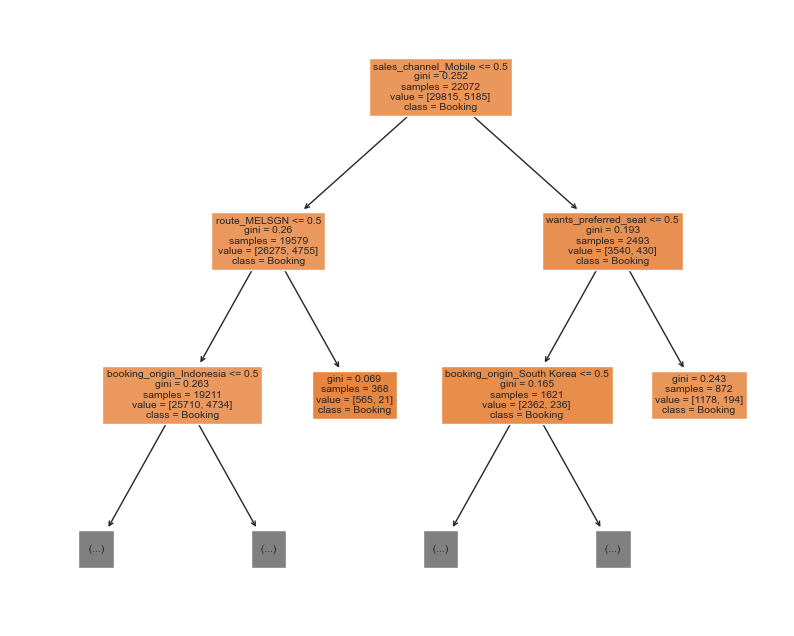

In [290]:

plt.figure(figsize=(10,8))
plot_tree(best_rf.estimators_[7], feature_names = X.columns,class_names=['Booking', "No booking"],filled=True, max_depth =2);

### Tuning the hyperparameters with RandomSearchSV

In [269]:
# Tune the hyperparameters RandomizedSearchSV
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20),
              'min_samples_leaf': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 7, 'min_samples_leaf': 13, 'n_estimators': 213}


### Identifying important features 

In order to quantify the usefulness of all the variables in the entire random forest, we can look at the relative importances of the variables.

In [299]:
#Sorting data by feature importance
imp_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": best_rf.feature_importances_
})
imp_df.sort_values(by="Importance", ascending=False)

,Feature,Importance
864,booking_origin_Malaysia,0.191366
817,booking_origin_Australia,0.155192
2,length_of_stay,0.075370
726,route_PENTPE,0.057865
8,flight_duration,0.051093
...,...,...
36,route_BDOMEL,0.000000
378,route_HKTIKA,0.000000
379,route_HKTJED,0.000000
381,route_HKTKTM,0.000000


In [187]:
#In percentages
importances = best_rf.feature_importances_
columns = X.columns
sorted_indices = np.argsort(importances)
data = []
i = 0
while i < len(columns):
    feature = columns[i]
    importance = round(importances[i] * 100, 2)
    data.append({'Feature': feature, 'Importance': importance})
    i += 1

dfim = pd.DataFrame(data)
dfim = dfim.sort_values(by='Importance', ascending=False)
dfim.head(10)

,Feature,Importance
65,booking_origin_Malaysia,27.44
18,booking_origin_Australia,22.32
8,flight_duration,9.39
2,length_of_stay,9.18
1,purchase_lead,3.77
5,wants_extra_baggage,3.21
51,booking_origin_Indonesia,2.47
3,flight_hour,2.32
6,wants_preferred_seat,2.28
99,booking_origin_South Korea,2.01


### Visualizing important features 

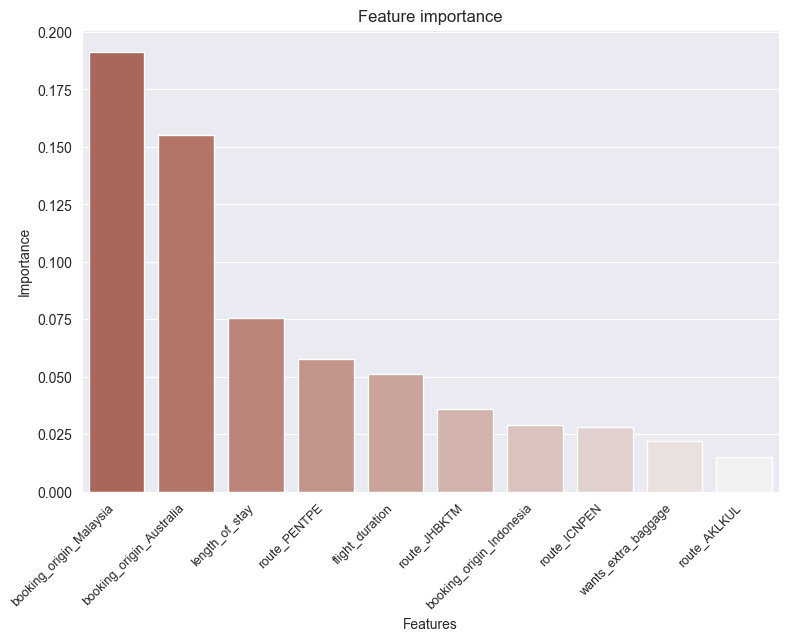

In [271]:

feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
palette = sns.light_palette((20, 60, 50), input="husl", reverse=True, n_colors=10)
sns.set_style("darkgrid")
plt.figure(figsize=(9,6))
sns.barplot(x=feature_importances[:10].index, y=feature_importances[:10].values, palette=palette)
plt.title('Feature importance')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.ylabel('Importance')
plt.show()

### Making predictions

In [294]:
best_rf = rand_search.best_estimator_
y_pred = best_rf.predict(X_test)

In [295]:
dff = pd.DataFrame({
    "Prediction": y_pred})
dff.sort_values(by = 'Prediction',ascending=False)

,Prediction
0,0
10004,0
9992,0
9993,0
9994,0
...,...
5004,0
5005,0
5006,0
5007,0


### Model evaluation

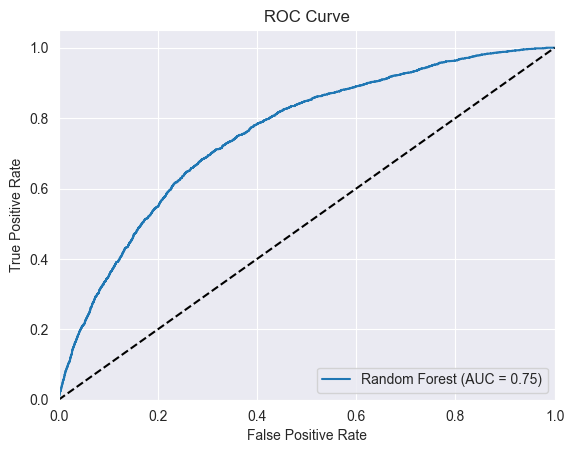

In [258]:
from sklearn.metrics import roc_auc_score, roc_curve
y_pred_prob = best_rf.predict_proba(X_test)[:, 1]

# calculate AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred_prob)

# plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='Random Forest (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

When AUC is 0.5<score<1, there is a high chance that the classifier will be able to distinguish the positive class values from the negative ones. This is so because the classifier is able to detect more numbers of True positives and True negatives than False negatives and False positives.

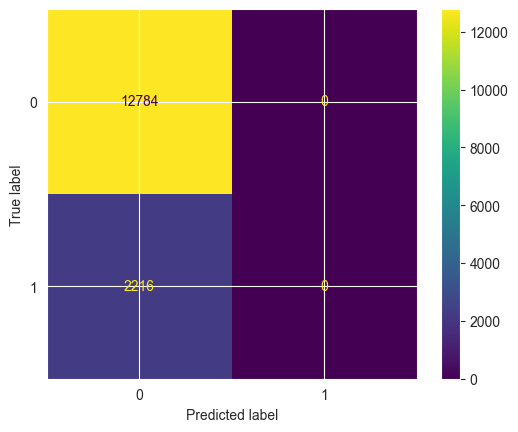

In [257]:
y_pred = best_rf.predict(X_test)


cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();